In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import scipy as sp
from gwaslab.Log import Log

In [2]:
mysumstats =gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             p="P",
             n="N",
             se="SE",nrows=500000)

Thu Jun 22 14:45:24 2023 GWASLab version 3.4.15 https://cloufield.github.io/gwaslab/
Thu Jun 22 14:45:24 2023 (C) 2022-2023, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
Thu Jun 22 14:45:24 2023 Start to initiate from file :t2d_bbj.txt.gz
Thu Jun 22 14:45:25 2023  -Reading columns          : CHR,ALT,P,Frq,POS,SE,SNP,BETA,REF,N
Thu Jun 22 14:45:25 2023  -Renaming columns to      : CHR,EA,P,EAF,POS,SE,SNPID,BETA,NEA,N
Thu Jun 22 14:45:25 2023  -Current Dataframe shape : 500000  x  10
Thu Jun 22 14:45:25 2023  -Initiating a status column: STATUS ...
Thu Jun 22 14:45:25 2023  -NEAF is specified...
Thu Jun 22 14:45:25 2023  -Checking if 0<= NEAF <=1 ...
Thu Jun 22 14:45:25 2023  -Converted NEAF to EAF.
Thu Jun 22 14:45:25 2023  -Removed 0 variants with bad NEAF.
Thu Jun 22 14:45:25 2023 Start to reorder the columns...
Thu Jun 22 14:45:25 2023  -Current Dataframe shape : 500000  x  11
Thu Jun 22 14:45:25 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS


In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.597000,166718,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.597300,166718,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.690800,166718,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.284600,166718,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.270500,166718,9999999
...,...,...,...,...,...,...,...,...,...,...,...
499995,1:116768304_A_G,1,116768304,G,A,0.0020,0.0881,0.1312,0.502100,166718,9999999
499996,1:116768310_T_C,1,116768310,C,T,0.0059,0.0575,0.0584,0.324800,191764,9999999
499997,1:116768460_G_A,1,116768460,G,A,0.9896,0.1191,0.0442,0.006983,191764,9999999
499998,1:116768479_T_A,1,116768479,T,A,0.9003,0.0067,0.0149,0.652700,191764,9999999


Thu Jun 22 14:45:44 2023 Start to create trumpet plot...
Thu Jun 22 14:45:44 2023 Excluding variants with P values > 0.001
Thu Jun 22 14:45:44 2023 Plotting 3034 variants...
Thu Jun 22 14:45:44 2023 Start filling data using existing columns...
Thu Jun 22 14:45:44 2023  -Raw input columns:  ['BETA', 'EAF', 'N', 'P']
Thu Jun 22 14:45:44 2023  -Overwrite mode:  False
Thu Jun 22 14:45:44 2023   -Skipping columns:  []
Thu Jun 22 14:45:44 2023  -Filling columns:  ['MAF']
Thu Jun 22 14:45:44 2023   - Filling Columns iteratively...
Thu Jun 22 14:45:44 2023   - Filling MAF using EAF column...
Thu Jun 22 14:45:44 2023 Start to reorder the columns...
Thu Jun 22 14:45:44 2023  -Current Dataframe shape : 3034  x  5
Thu Jun 22 14:45:44 2023  -Reordering columns to    : EAF,MAF,BETA,P,N
Thu Jun 22 14:45:44 2023 Finished sorting columns successfully!
Thu Jun 22 14:45:44 2023 Finished filling data using existing columns.
Thu Jun 22 14:45:44 2023  -Updating eaf-beta matrix...
Thu Jun 22 14:45:44 2023  -

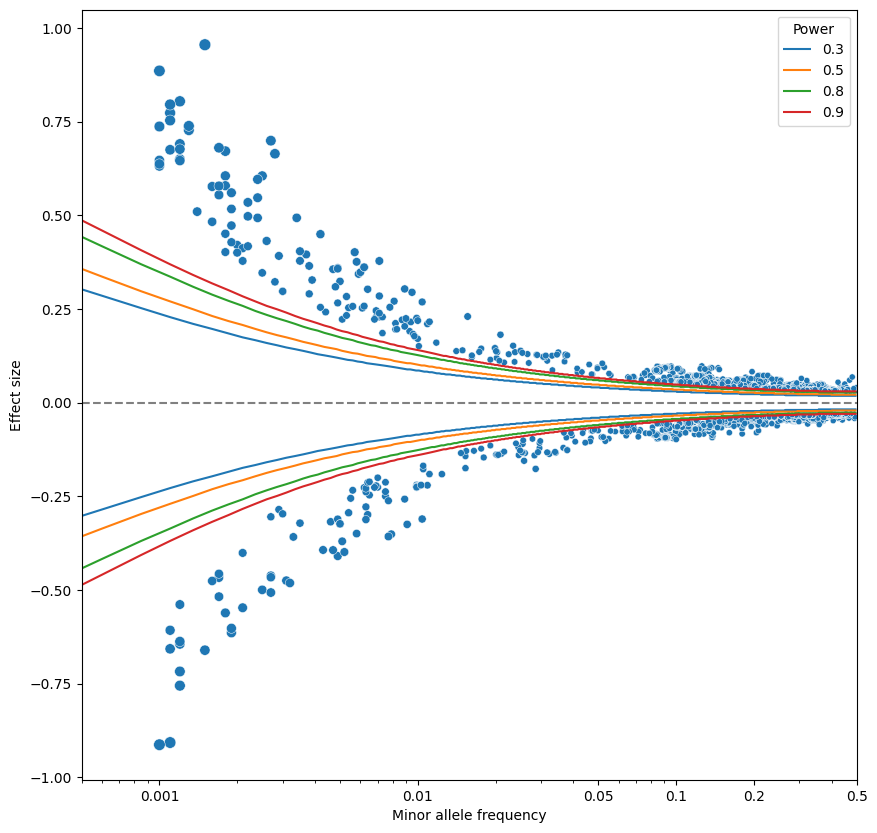

In [5]:
a = mysumstats.plot_trumpet(mode="b",scase=40000,scontrol=140000,ts=[0.3,0.5,0.8,0.9] ,sig_level=1e-3,p_level=1e-3,n_matrix=2000)